<a href="https://colab.research.google.com/github/ambideXtrous9/Machine-Learning-Assignments/blob/main/214161006_214161011_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EE 527 Machine Learning Lab
# Assignment 02
-----------------------------------------
214161006 Pathak Sanchit Vivekanand

214161011 Sushovan Saha

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Q1. Generate a set of points around a line y = ax + b

(a) Choose a = 2 and b = 3

In [ ]:
a = 2
b = 3

(b) Select the range for x as [−10, 10] and generate n = 100 values for x
in that interval.

In [ ]:
X = np.linspace(-10, 10, 100)

(c) Compute the values of y for each x as $y_{i} = 2x_{i} + 3$.

In [ ]:
Y = a*X + b

(d) Plot the line y = 2x + 3 in black color.

(e) Generate a set of n points around the line using the equation: $y_{i} = 2x_{i} + 3 + \sigma N(0, 1)$ where $\sigma$ is the standard deviation and N(0, 1) is the zero-mean unity-variance normal distribution

(f) Show the scatter plot of these noisy points (in red color) on the same
graph generated in step (d).

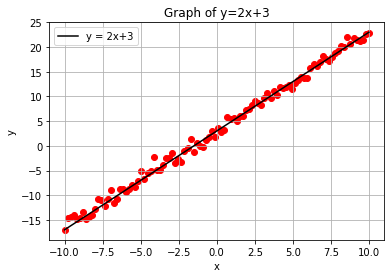

In [ ]:
# (e)
sigma = 1
Z = Y + sigma * np.random.standard_normal(size=100)

# (d) & (f)
plt.plot(X, Y, "-k", label="y = 2x+3")
plt.scatter(X, Z, c ="red")
plt.title("Graph of y=2x+3")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.grid()
plt.show()

## Q2 Plot the average error surface E for different values of a and b in the interval of [−10 : 0.1 : 10].

(a) Vary both a and b in steps of 0.1 in the interval [−10, 10]

In [ ]:
#setting high=10.1 since we have to include 10
a = np.arange(-10, 10.1, 0.1)
b = np.arange(-10, 10.1, 0.1)
len_a = a.shape[0]
len_b = b.shape[0]

#get data from Q1
yi = Z
xi = X
n = 100

(b) Compute the element-wise error as $e_{i} = y_{i} − \hat{y}_{i} $ where $\hat{y}_{i} = ax_{i} + b$ and $y_{i}$ is computed using equation 1

(c) Compute the average error as $E = \frac{1}{n} \Sigma_{i=i}^{n} e_{i}^{2}$

(d) Compute the average error values for all combinations of a and b.

In [ ]:
#create a meshgrid of a & b
aa,bb = np.meshgrid(a,b)

#compute avg error as per (b) & (c) for all comibnations of a & b
E = np.zeros(shape=aa.shape)
for i in range(len_a):
  for j in range(len_b):
    #compute ei
    ei = yi - (aa[i,j]*xi + bb[i,j])
    #compute E
    E[i,j] = np.dot(ei,ei)/n
E.shape

(201, 201)

(e) Plot the error surface with the values of a along x-axis, that of b along y-axis and E along z-axis.

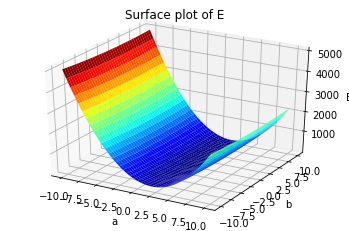

In [ ]:
#plot surface plot of E
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(aa,bb,E,cmap="jet")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("E")
ax.set_title("Surface plot of E")
plt.show()

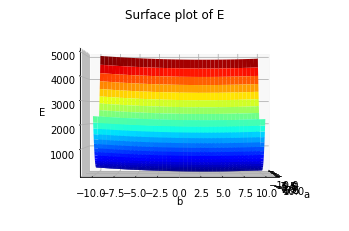

In [ ]:
#same plot but from a different angle
plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(aa,bb,E,cmap="jet")
ax.set_xlabel("a")
ax.set_ylabel("b")
ax.set_zlabel("E")
ax.set_title("Surface plot of E")
ax.view_init(elev=0, azim=0)
plt.show()

## Q3. Parameters a and b can be obtained by  solving an algebraic equation called the Normal Equation. It is defined as below. 

$ Θ = (X^{T}.X)^{-1}.X^{T}.y $

In [ ]:
x_train = np.c_[np.ones((len(X),1)),X]

# Note that we add a default bias term of 1 —> it will be updated during our calculations. 
# Not adding this term will lead to a wrong solution.

theta = np.dot(np.linalg.pinv(x_train),Y)
a = theta[1]
b = theta[0]

print("a = ",a)
print("b = ",b)


a =  2.0
b =  3.000000000000001


## Q4. Solve for a and b using the Gradient Descent approach where the values
of $p = (a, b)^{T}$ in the $(k + 1)^{th}$ iteration is updated as:

$p_{k+1} = p_{k} − \eta \nabla_{p}E|_{p=pk}$

Vary the update rate $\eta$ and the initial values $(a_{0}, b_{0})$ and note the final solution after 100 iterations. Plot the trajectory of the solutions $(a_{k}, b_{k})$ for varying $(a_{0}, b_{0}, \eta)$ on the contour plot of E on (a, b) plane.

a = 2.0, b = 3.118092235511947
a = 1.9999999999999962, b = 2.923033120135657
a = 2.0008728982981125, b = -1.0928340234421374


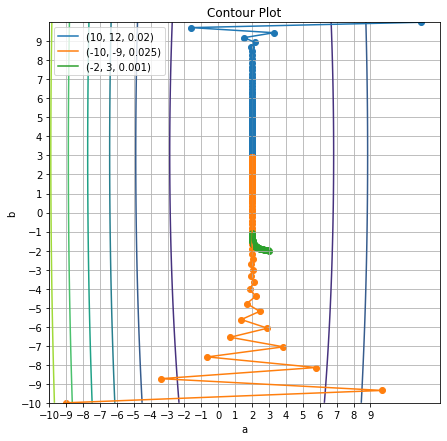

In [ ]:
def gradient_descent(x,y,theta):

    preds = np.matmul(x,theta)
    
    error_term = preds-y
    
    e = np.mean((error_term)**2)
    EE.append(e)
    
    W = 2*np.matmul(x.T,error_term)/len(x)
    return W


def solve(x,y,a0,b0,ETA):
    
    epochs = 100
    eta = ETA
    
    x = np.c_[np.ones((len(x),1)),x]
    
    theta = np.array([a0,b0])
    
    for i in range(epochs):
        grad = gradient_descent(x,y,theta)
        A.append(theta[1])
        B.append(theta[0])
        theta = theta - eta*grad
        
    return theta

def plot_my_contour(aa,bb,E):
  plt.figure(figsize=(7,7))
  plt.contour(aa,bb,E)
  plt.title("Contour Plot")
  plt.xlabel("a")
  plt.ylabel("b")
  plt.grid(True)
  plt.xticks(ticks=range(-10,10,1))
  plt.yticks(ticks=range(-10,10,1))

def plot_my_trajectory(A,B,a0,b0,eta):
  plt.scatter(A,B)
  plt.plot(A,B, label="("+str(a0)+", "+str(b0)+", "+str(eta)+")")
  plt.legend(loc='upper left')

#get values from Q1
x = X
y = Y

#first plot the contour as background to our trajectories
plot_my_contour(aa,bb,E)

#----do gradient descent for various values of (a0,b0,eta)----

A = []
B = []
EE = []
#set (a0,b0,eta)
a0 = 10
b0 = 12
eta = 0.02
#run gradient descent
model = solve(x,y,a0,b0,eta)
print("a = ", model[1], ", b = ", model[0], sep='')
#plot the trajectory
plot_my_trajectory(A,B,a0,b0,eta)

A = []
B = []
EE = []
#set (a0,b0,eta)
a0 = -10
b0 = -9
eta = 0.025
#run gradient descent
model = solve(x,y,a0,b0,eta)
print("a = ", model[1], ", b = ", model[0], sep='')
#plot the trajectory
plot_my_trajectory(A,B,a0,b0,eta)

A = []
B = []
EE = []
#set (a0,b0,eta)
a0 = -2
b0 = 3
eta = 0.001
#run gradient descent
model = solve(x,y,a0,b0,eta)
print("a = ", model[1], ", b = ", model[0], sep='')
#plot the trajectory
plot_my_trajectory(A,B,a0,b0,eta)

#finally hold off plot
plt.show()

## Q5. Consider the multi-modal function given by:

$z = 1.7*exp[-\{\frac{(x-3)^{2}}{10} + \frac{(y-3)^{2}}{10}\}] + $
$exp[-\{\frac{(x+5)^{2}}{8} + \frac{(y+5)^{2}}{8}\}] + 2*exp[-\{\frac{x^{2}}{4} + \frac{y^{2}}{5}\}] +$
$1.5*exp[-\{\frac{(x-4)^{2}}{18} + \frac{(y+4)^{2}}{16}\}] + 1.2*exp[-\{\frac{(x+4)^{2}}{18} + \frac{(y-4)^{2}}{18}\}]$

Display the surface plot and contour plot of the above function in the
search space given by $S_{min} = [x_{min}, y_{min}]^{T} = [−10,−10]^{T}$ and $S_{max} = [x_{max}, y_{max}]^{T} = [10, 10]^{T}$.

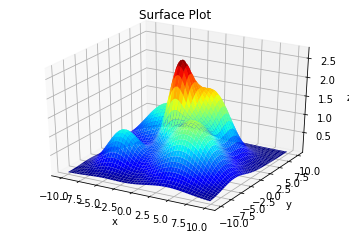

In [ ]:
#set min & max of x & y as per question
xmin = -10
xmax = 10
ymin = -10
ymax = 10

#set the x-axis & y-axis
x = np.arange(xmin,xmax,0.1)
y = np.arange(ymin,ymax,0.1)

#generate a meshgrid
x1,y1 = np.meshgrid(x,y)

#define the equation of given multi-modal function
def mini_eqn(x,y,a,b,c,d):
  '''This function returns the exp{-(((x-a)**2)/c + ((y-b)**2)/d)} sub-part of the given equation of z.
  This is done for code-readability'''
  temp1 = ((x-a)**2)/c
  temp2 = ((y-b)**2)/d
  temp = temp1+temp2
  return np.exp(-temp)

z = 1.7*mini_eqn(x1,y1,3,3,10,10)+ mini_eqn(x1,y1,-5,-5,8,8) + 2*mini_eqn(x1,y1,0,0,4,5)+ 1.5*mini_eqn(x1,y1,4,-4,18,16) + 1.2*mini_eqn(x1,y1,-4,4,18,16)

#plot the surface plot of z
plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(x1,y1,z, cmap="jet")
ax.set_title("Surface Plot")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.show()

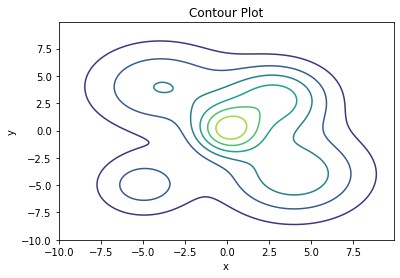

In [ ]:
#plot the contour plot of z
plt.figure()
plt.contour(x1,y1,z)
plt.title("Contour Plot")
plt.xlabel("x")
plt.ylabel("y")
plt.show()